In [396]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

# 1. Business understanding
We are analyzing the student performance dataset to understand what factors affect the students performance the most, can we predict the final grade of a student based on the other features in the dataset and how different learning styles affect the performance of the student. We will use the following columns to predict the final grade of a student:

In [397]:
df = pd.read_csv('./datasets/student_performance_large_dataset.csv').drop(columns=['Student_ID'], axis=1)
df

,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,20,Male,30,Auditory,6,Yes,62,58,76,Yes,Medium,17,6,C
9996,23,Female,16,Visual,8,Yes,54,84,86,Yes,Medium,6,5,B
9997,26,Male,23,Visual,3,Yes,54,40,70,No,Medium,20,8,D
9998,18,Male,41,Reading/Writing,7,Yes,66,45,90,Yes,Low,6,8,D


# 2. Data understanding
The data is pulled from Kaggle and created by Adil Shahim (https://www.kaggle.com/datasets/adilshamim8/student-performance-and-learning-style). The dataset contains the following columns:

- **Student_ID** – Unique identifier for each student
- **Age** – Student's age (18-30 years)
- **Gender** – Male, Female, or Other
- **Study_Hours_per_Week** – Hours spent studying per week (5-50 hours)
- **Preferred_Learning_Style** – Visual, Auditory, Reading/Writing, Kinesthetic
- **Online_Courses_Completed** – Number of online courses completed (0-20)
- **Participation_in_Discussions** – Whether the student actively participates in discussions (Yes/No)
- **Assignment_Completion_Rate (%)** – Percentage of assignments completed (50%-100%)
- **Exam_Score (%)** – Student’s final exam score (40%-100%)
- **Attendance_Rate (%)** – Percentage of classes attended (50%-100%)
- **Use_of_Educational_Tech** – Whether the student uses educational technology (Yes/No)
- **Self_Reported_Stress_Level** – Student’s stress level (Low, Medium, High)
- **Time_Spent_on_Social_Media** (hours/week) – Weekly hours spent on social media (0-30 hours)
- **Sleep_Hours_per_Night** – Average sleep duration (4-10 hours)
- **Final_Grade** – Assigned grade based on exam score (A, B, C, D, F)

The dataset does not contain missing values by default. However, we will check for missing values and duplicates in the dataset just to be sure.

# 3. Data preparation
We will check for missing values and duplicates in the dataset. We will also check for unique values in each column to ensure that the data is clean and ready for analysis. We will also map the categorical and boolean values to numerical values for easier analysis. We standardize the values for seeing

In [398]:
print(df.describe()) # Summary statistics

                Age  Study_Hours_per_Week  Online_Courses_Completed  \
count  10000.000000          10000.000000              10000.000000   
mean      23.478800             27.130300                 10.007900   
std        3.461986             13.002547                  6.136726   
min       18.000000              5.000000                  0.000000   
25%       20.000000             16.000000                  5.000000   
50%       23.000000             27.000000                 10.000000   
75%       27.000000             38.000000                 15.000000   
max       29.000000             49.000000                 20.000000   

       Assignment_Completion_Rate (%)  Exam_Score (%)  Attendance_Rate (%)  \
count                    10000.000000    10000.000000         10000.000000   
mean                        74.922000       70.188900            75.085100   
std                         14.675437       17.649447            14.749251   
min                         50.000000       40.0

In [399]:
missing_values = df.isnull().sum() # Check for missing values
print(missing_values)

Age                                        0
Gender                                     0
Study_Hours_per_Week                       0
Preferred_Learning_Style                   0
Online_Courses_Completed                   0
Participation_in_Discussions               0
Assignment_Completion_Rate (%)             0
Exam_Score (%)                             0
Attendance_Rate (%)                        0
Use_of_Educational_Tech                    0
Self_Reported_Stress_Level                 0
Time_Spent_on_Social_Media (hours/week)    0
Sleep_Hours_per_Night                      0
Final_Grade                                0
dtype: int64


## Mapping categorical and boolean values to numerical values.

In [400]:
# df["Student_ID"] = df["Student_ID"].str[1:].astype('int') # Converting student IDs to integers from (S0001, S0002, S0003, ...) to (1, 2, 3, ...)
df = pd.get_dummies(df, columns=["Gender"], drop_first=True) # One hot encoding for Gender
df = pd.get_dummies(df, columns=["Preferred_Learning_Style"], drop_first=True) # One hot encoding for preferred learning style
df["Participation_in_Discussions"] = df["Participation_in_Discussions"].map({"Yes": 1, "No": 0})
df["Use_of_Educational_Tech"] = df["Use_of_Educational_Tech"].map({"Yes": 1, "No": 0})
df["Self_Reported_Stress_Level"] = df["Self_Reported_Stress_Level"].map({"Low" : 1, "Medium" : 2, "High" : 3}); # Mapping stress levels by numbers
df["Final_Grade"] = df["Final_Grade"].astype("category")

## 4. Modelling
We will use the decision trees to see which features affect the final grade of a student the most.

(7500, 12) (2500, 12) (7500,) (2500,)


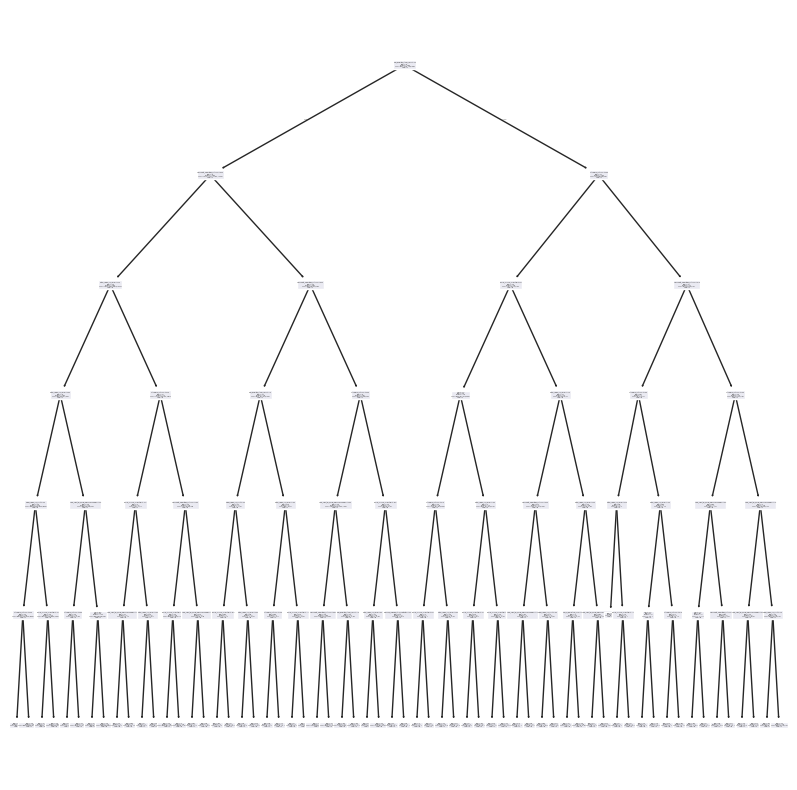

In [401]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree  
from sklearn.metrics import recall_score, classification_report

X = df.drop(['Final_Grade', 'Exam_Score (%)', "Participation_in_Discussions", "Gender_Male", "Gender_Other"], axis = 1) # input features
y = df['Final_Grade'].astype('category') # target features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=20) # extract test set
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) # check the shape of the train and test sets

model = DecisionTreeClassifier(max_depth=6, min_samples_split=5, random_state=20)
model.fit(X_train, y_train) # fit the model

fig = plt.figure(figsize = (10, 10))
plot_tree(model, feature_names = X.keys(), class_names = ['A', 'B', 'C', 'D'])
plt.show()

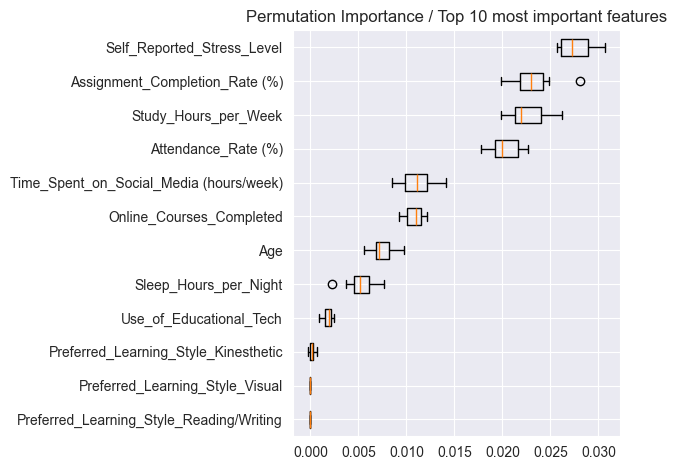

In [402]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X, y, n_repeats=10, scoring="accuracy", random_state=0, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, tick_labels=X.columns[sorted_idx])
ax.set_title("Permutation Importance / Top 10 most important features")
fig.tight_layout()
plt.show()

Accuracy: 0.2656
Recall Score: 0.2656
              precision    recall  f1-score   support

           A       0.28      0.56      0.37       663
           B       0.28      0.18      0.22       620
           C       0.26      0.09      0.13       642
           D       0.23      0.23      0.23       575

    accuracy                           0.27      2500
   macro avg       0.26      0.26      0.24      2500
weighted avg       0.26      0.27      0.24      2500


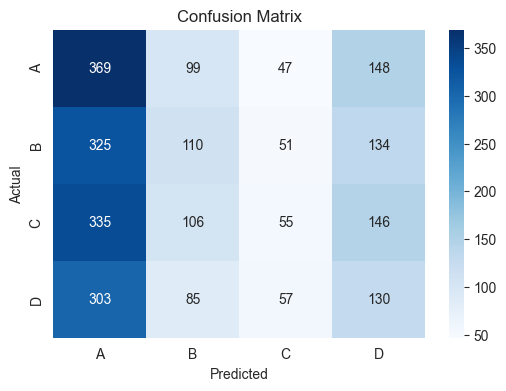

In [403]:
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix

# Predictions on test data
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Recall (you already have this)
recall = recall_score(y_test, y_pred, average='weighted')  # 'weighted' handles class imbalance
print("Recall Score:", recall)

# Full classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()